In [1]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns

/pubhome/xli02/opt/miniconda/envs/fast/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/pubhome/xli02/opt/miniconda/envs/fast/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/pubhome/xli02/opt/miniconda/envs/fast/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/pubhome/xli02/opt/miniconda/envs/

In [2]:
from pathlib import Path

# PLANet_Uw

In [5]:
shap_dir = '/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/split_shap_res/rm_core_ids'
dataset_name = 'PLANet_Uw'

In [6]:
npy_files = [str(p) for p in list(Path(f'{shap_dir}/{dataset_name}/').glob('*npy'))]
npy_files.sort()
len(npy_files)

14

In [10]:
# np.load(npy_files[0]).shape

(3998, 42, 42)

In [11]:
# np.concatenate([np.load(n) for n in npy_files]).shape

(55798, 42, 42)

In [7]:
Uw_shap_inter = np.concatenate([np.load(n) for n in npy_files])
Uw_shap_inter.shape

(55798, 42, 42)

In [8]:
features = pd.read_csv("/pubhome/xli02/project/PLIM/deep_learning/RFscore/featured_data/tow_datasets_features_6A.csv", sep='\t')

vina_title =['vina_gauss1',
            'vina_gauss2',
            'vina_repulsion',
            'vina_hydrophobic',
            'vina_hydrogen',
            'vina_num_rotors']
rf_v1_title = features.columns.tolist()[:36]
feature_list = vina_title+rf_v1_title

In [9]:
## change feature names
## change 6.7(l.p) --> N-C(p.l)
## change vina_repulsion --> repulsion
atom_dict = {"6":"C","7":"N","8":"O","9":"F","15":"P","16":"S","17":"Cl","35":"Br","53":"I"}
change_name_dict = {}
for ft in feature_list:
    if "vina" in ft:
        change_name_dict[ft] = "_".join(ft.split("_")[1:])
    else:
        change_name_dict[ft] = f'{atom_dict[ft.split(".")[1]]}-{atom_dict[ft.split(".")[0]]}'
change_name_dict

{'vina_gauss1': 'gauss1',
 'vina_gauss2': 'gauss2',
 'vina_repulsion': 'repulsion',
 'vina_hydrophobic': 'hydrophobic',
 'vina_hydrogen': 'hydrogen',
 'vina_num_rotors': 'num_rotors',
 '6.6': 'C-C',
 '6.7': 'N-C',
 '6.8': 'O-C',
 '6.16': 'S-C',
 '7.6': 'C-N',
 '7.7': 'N-N',
 '7.8': 'O-N',
 '7.16': 'S-N',
 '8.6': 'C-O',
 '8.7': 'N-O',
 '8.8': 'O-O',
 '8.16': 'S-O',
 '9.6': 'C-F',
 '9.7': 'N-F',
 '9.8': 'O-F',
 '9.16': 'S-F',
 '15.6': 'C-P',
 '15.7': 'N-P',
 '15.8': 'O-P',
 '15.16': 'S-P',
 '16.6': 'C-S',
 '16.7': 'N-S',
 '16.8': 'O-S',
 '16.16': 'S-S',
 '17.6': 'C-Cl',
 '17.7': 'N-Cl',
 '17.8': 'O-Cl',
 '17.16': 'S-Cl',
 '35.6': 'C-Br',
 '35.7': 'N-Br',
 '35.8': 'O-Br',
 '35.16': 'S-Br',
 '53.6': 'C-I',
 '53.7': 'N-I',
 '53.8': 'O-I',
 '53.16': 'S-I'}

In [10]:
changed_feature_list = list(change_name_dict.values())
changed_feature_list

['gauss1',
 'gauss2',
 'repulsion',
 'hydrophobic',
 'hydrogen',
 'num_rotors',
 'C-C',
 'N-C',
 'O-C',
 'S-C',
 'C-N',
 'N-N',
 'O-N',
 'S-N',
 'C-O',
 'N-O',
 'O-O',
 'S-O',
 'C-F',
 'N-F',
 'O-F',
 'S-F',
 'C-P',
 'N-P',
 'O-P',
 'S-P',
 'C-S',
 'N-S',
 'O-S',
 'S-S',
 'C-Cl',
 'N-Cl',
 'O-Cl',
 'S-Cl',
 'C-Br',
 'N-Br',
 'O-Br',
 'S-Br',
 'C-I',
 'N-I',
 'O-I',
 'S-I']

In [14]:
# with open(f"/pubhome/xli02/project/PLIM/deep_learning/RFscore/test_res/{dataset_name}_Rm_core/1/best_model_VR1_RF.pkl", "rb") as f:
#     Uw_model = joblib.load(f)
# Uw_explainer = shap.TreeExplainer(Uw_model)

In [11]:
Uw_train = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/dataset/true_lig_alone/rm_core_ids/PLANet_Uw/complex_6A/train.csv', sep='\t')
Uw_train

,unique_identify,-logAffi
0,CHEMBL5173_2za3_CHEMBL1164065,0.040959
1,CHEMBL4630_2xf0_CHEMBL1236804,0.180000
2,CHEMBL235_4xum_CHEMBL1784945,0.207608
3,CHEMBL205_1zfq_CHEMBL208108,0.602000
4,CHEMBL4696_1a8i_CHEMBL609856,0.657577
...,...,...
55799,CHEMBL3198_1q84_CHEMBL4239268,13.481486
55800,CHEMBL3198_5ehn_CHEMBL3314092,13.481486
55801,CHEMBL3198_5ehn_CHEMBL4243833,13.481486
55802,CHEMBL3198_1q83_CHEMBL4246013,13.481486


In [12]:
Uw_feature = pd.merge(Uw_train, features, on=['unique_identify','-logAffi'])
Uw_feature.shape

(55798, 152)

In [13]:
Uw_feature.rename(columns=change_name_dict, inplace=True)

<Figure size 1368x1296 with 0 Axes>

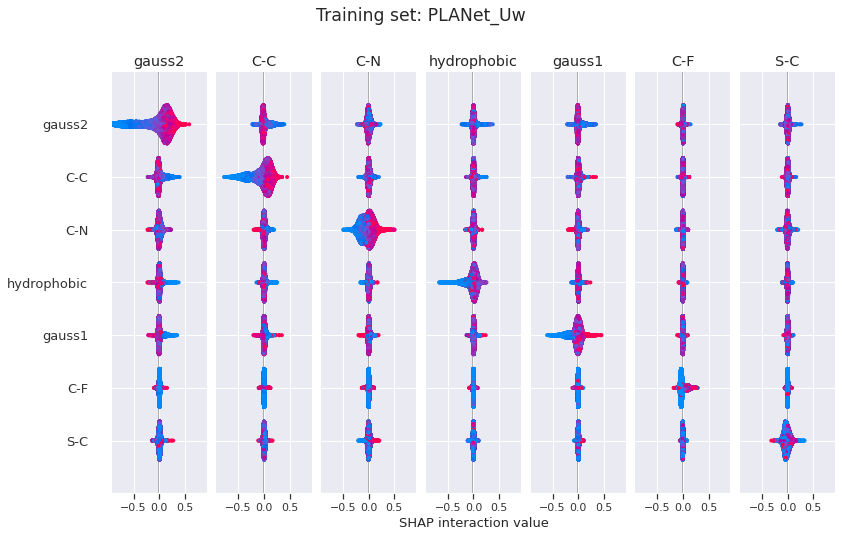

In [68]:
plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
shap.summary_plot(Uw_shap_inter, Uw_feature[changed_feature_list], plot_type="bar", show=False)
plt.suptitle(f'Training set: PLANet_Uw', y=1.1)
plt.savefig("/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/split_shap_res/rm_core_ids/PLANet_Uw/imgs/Uw_inter_value_beeswarm.png", dpi=800, bbox_inches='tight')

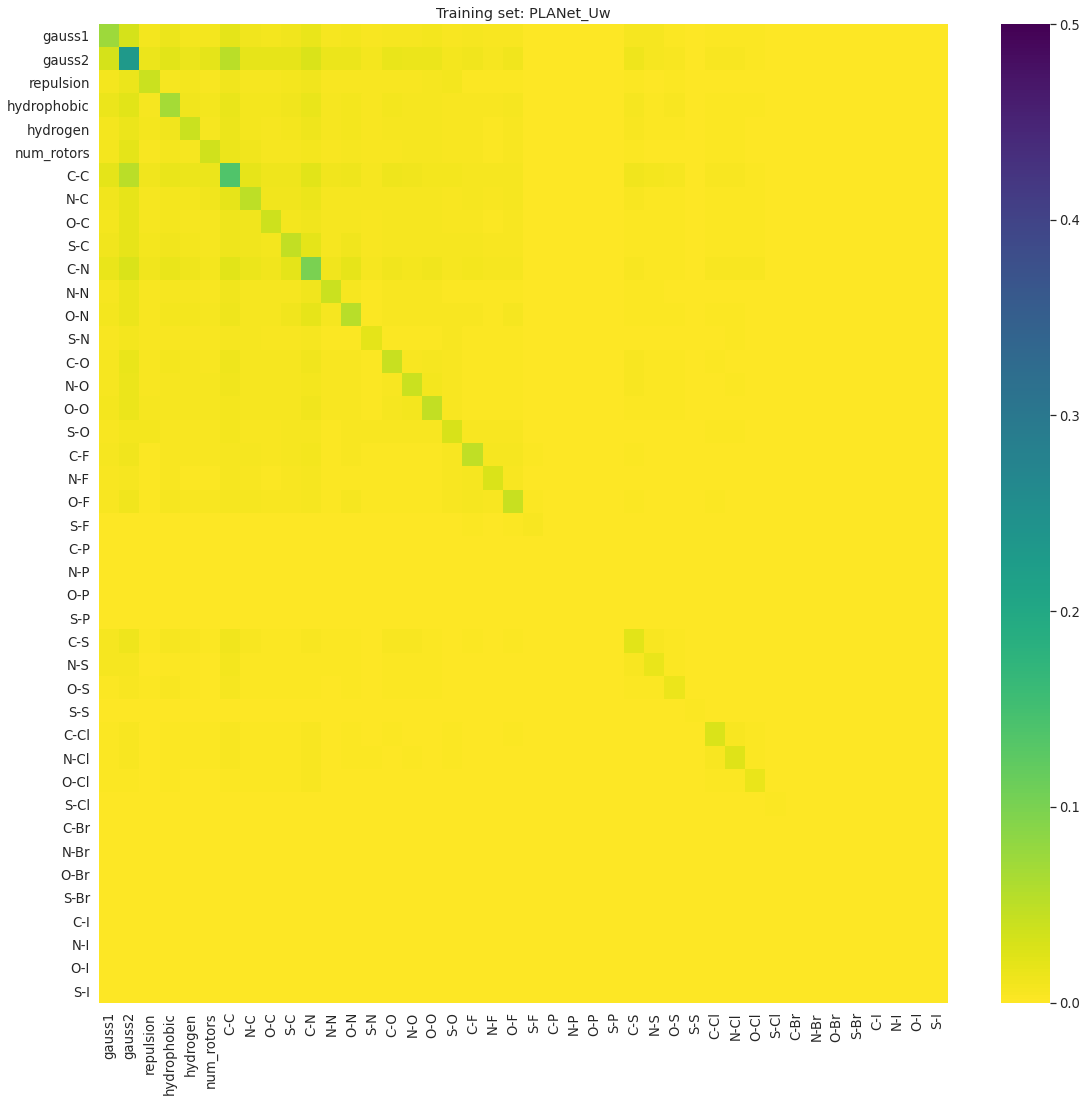

In [67]:
cm = plt.cm.get_cmap('viridis_r')
mean_shap = np.abs(Uw_shap_inter).mean(0)
df = pd.DataFrame(mean_shap,index=changed_feature_list,columns=changed_feature_list)
df.where(df.values == np.diagonal(df), df.values*2, inplace=True)

plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
sns.heatmap(df,cmap=cm,fmt='.3g',cbar=True,vmin=0, vmax=0.5)
plt.yticks(rotation=0)
plt.title("Training set: PLANet_Uw")
plt.savefig("/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/split_shap_res/rm_core_ids/PLANet_Uw/imgs/Uw_inter_value_heatmap.png", dpi=800, bbox_inches='tight')

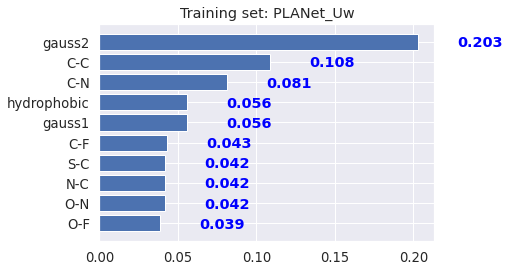

In [65]:
mean_feature = np.mean(np.abs(np.sum(Uw_shap_inter, axis=1)), axis=0)
sorted_idx = np.argsort(mean_feature)
fig, ax = plt.subplots()
ax.barh(np.array(changed_feature_list)[sorted_idx][-10:], mean_feature[sorted_idx][-10:])
for i, v in enumerate(mean_feature[sorted_idx][-10:]):
    ax.text(v+0.025, i - .25, round(v, 3),
            color = 'blue', fontweight = 'bold')
plt.title("Training set: PLANet_Uw")
plt.savefig("/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/split_shap_res/rm_core_ids/PLANet_Uw/imgs/Uw_inter_value_mean_shap_top_10.png", dpi=800, bbox_inches='tight')

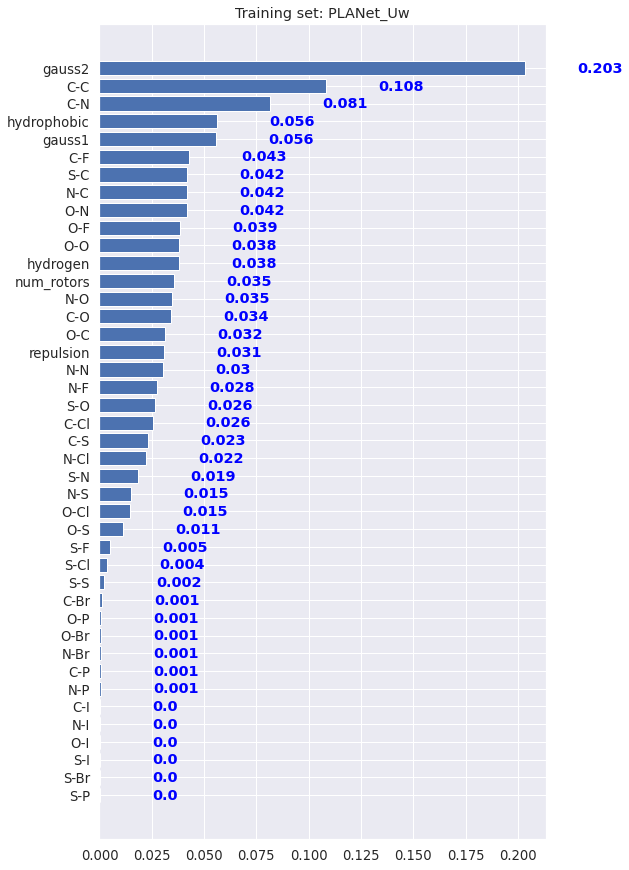

In [70]:
mean_feature = np.mean(np.abs(np.sum(Uw_shap_inter, axis=1)), axis=0)
sorted_idx = np.argsort(mean_feature)
fig, ax = plt.subplots(figsize=(8,15))
ax.barh(np.array(changed_feature_list)[sorted_idx], mean_feature[sorted_idx])
for i, v in enumerate(mean_feature[sorted_idx]):
    ax.text(v+0.025, i - .25, round(v, 3),
            color = 'blue', fontweight = 'bold')
plt.title("Training set: PLANet_Uw")
plt.savefig("/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/split_shap_res/rm_core_ids/PLANet_Uw/imgs/Uw_inter_value_mean_shap.png", dpi=800, bbox_inches='tight')

In [20]:
# Uw_train_ = pd.read_csv(f'/pubhome/xli02/project/PLIM/deep_learning/RFscore/test_res/{dataset_name}_Rm_core/1/detail_data_Train_VR1_RF.csv')
# Uw_train_.rename(columns={'true_label':'-logAffi'}, inplace=True)
# Uw_train_.drop(columns=['pred_label'], inplace=True)
# Uw_train_

,unique_identify,-logAffi
0,CHEMBL5173_2za3_CHEMBL1164065,0.040959
1,CHEMBL4630_2xf0_CHEMBL1236804,0.180000
2,CHEMBL235_4xum_CHEMBL1784945,0.207608
3,CHEMBL205_1zfq_CHEMBL208108,0.602000
4,CHEMBL4696_1a8i_CHEMBL609856,0.657577
...,...,...
55793,CHEMBL3198_1q84_CHEMBL4239268,13.481486
55794,CHEMBL3198_5ehn_CHEMBL3314092,13.481486
55795,CHEMBL3198_5ehn_CHEMBL4243833,13.481486
55796,CHEMBL3198_1q83_CHEMBL4246013,13.481486


In [24]:
# Uw_feature_ = pd.merge(Uw_train_, features, on=['unique_identify','-logAffi'])
# Uw_feature_.shape

(52890, 152)

In [25]:
# Uw_feature_.append(Uw_feature).drop_duplicates(keep=False)

,unique_identify,-logAffi,6.6,6.7,6.8,6.16,7.6,7.7,7.8,7.16,...,53.8_4-6,53.16_0-2,53.16_2-4,53.16_4-6,vina_gauss1,vina_gauss2,vina_repulsion,vina_hydrophobic,vina_hydrogen,vina_num_rotors
14,CHEMBL2360_4rac_CHEMBL2420976,1.136677,82.0,18.0,31.0,0.0,44.0,14.0,17.0,0.0,...,0.0,0.0,0.0,0.0,54.757278,806.837830,9.608866,1.622074,6.167997,4.0
33,CHEMBL335_2cm7_CHEMBL2296752,1.824000,426.0,96.0,104.0,4.0,58.0,16.0,13.0,1.0,...,0.0,0.0,0.0,0.0,155.792725,1737.968994,7.015732,79.980965,9.139808,17.0
34,CHEMBL1075088_3iqi_CHEMBL569309,1.880000,221.0,70.0,61.0,11.0,55.0,22.0,17.0,2.0,...,0.0,0.0,0.0,0.0,67.373589,1449.773438,4.885897,14.479512,5.090575,21.0
59,CHEMBL4855_1yon_CHEMBL1234613,2.161151,241.0,95.0,66.0,0.0,87.0,36.0,27.0,0.0,...,0.0,0.0,0.0,0.0,117.422020,1760.465576,7.542583,0.278370,6.961993,11.0
64,CHEMBL4531_4jck_CHEMBL405142,2.229148,84.0,36.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,40.003216,494.189667,2.975807,0.000000,5.657763,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39159,CHEMBL4247_3aox_CHEMBL3951779,7.976336,387.0,76.0,85.0,2.0,42.0,8.0,11.0,0.0,...,0.0,0.0,0.0,0.0,84.841637,1599.210205,1.402906,59.560371,0.765682,3.0
39165,CHEMBL284_2fjp_CHEMBL210974,7.977926,298.0,70.0,112.0,0.0,83.0,23.0,27.0,0.0,...,0.0,0.0,0.0,0.0,92.710503,1482.955933,6.500620,33.899609,6.509204,6.0
39214,CHEMBL2971_4aqc_CHEMBL3645061,7.984640,366.0,71.0,116.0,4.0,105.0,16.0,19.0,1.0,...,0.0,0.0,0.0,0.0,117.278938,1737.769653,3.964515,58.213070,2.452527,7.0
39237,CHEMBL1163125_5i80_CHEMBL3898174,7.989281,351.0,36.0,49.0,7.0,51.0,3.0,4.0,2.0,...,0.0,0.0,0.0,0.0,85.797684,1412.486816,1.635534,59.354458,1.628623,6.0


# PDBbind_minimized

In [14]:
features = pd.read_csv("/pubhome/xli02/project/PLIM/deep_learning/RFscore/featured_data/tow_datasets_features_6A.csv", sep='\t')
vina_title =['vina_gauss1',
            'vina_gauss2',
            'vina_repulsion',
            'vina_hydrophobic',
            'vina_hydrogen',
            'vina_num_rotors']
rf_v1_title = features.columns.tolist()[:36]
feature_list = vina_title+rf_v1_title

# change feature names
## 6.7(l.p) --> N-C(p.l)
## vina_repulsion --> repulsion
atom_dict = {"6":"C","7":"N","8":"O","9":"F","15":"P","16":"S","17":"Cl","35":"Br","53":"I"}
change_name_dict = {}
for ft in feature_list:
    if "vina" in ft:
        change_name_dict[ft] = "_".join(ft.split("_")[1:])
    else:
        change_name_dict[ft] = f'{atom_dict[ft.split(".")[1]]}-{atom_dict[ft.split(".")[0]]}'
changed_feature_list = list(change_name_dict.values())

In [15]:
dataset_name = 'PDBbind_minimized'

In [16]:
npy_files = [str(p) for p in list(Path(f'{shap_dir}/{dataset_name}/').glob('*npy'))]
npy_files.sort()
Pm_shap_inter = np.concatenate([np.load(n) for n in npy_files])
Pm_shap_inter.shape

(13515, 42, 42)

In [17]:
Pm_train = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/PDBbind/pdbbind_v2019/minimized/dataset/PDBbind_minimized_rm_core_ids/complex_6A/train.csv', sep='\t', header=0, names=['unique_identify', '-logAffi'])
Pm_feature = pd.merge(Pm_train, features, on=['unique_identify','-logAffi'])
Pm_feature.rename(columns=change_name_dict, inplace=True)
Pm_feature.shape

(13515, 152)

In [79]:
if not Path.exists(Path(f'{shap_dir}/{dataset_name}/imgs')):
    Path.mkdir(Path(f'{shap_dir}/{dataset_name}/imgs'), exist_ok=True)

<Figure size 1368x1296 with 0 Axes>

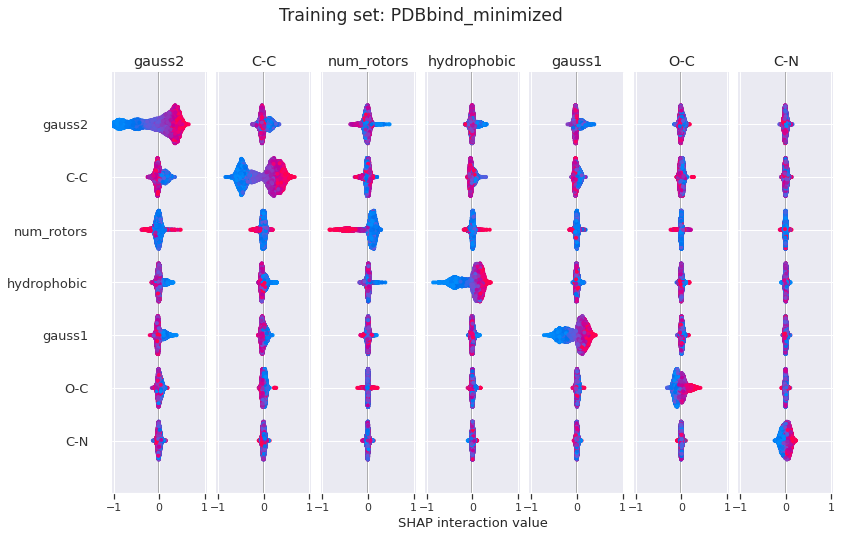

In [80]:
plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
shap.summary_plot(Pm_shap_inter, Pm_feature[changed_feature_list], plot_type="bar", show=False)
plt.suptitle(f'Training set: {dataset_name}', y=1.1)
plt.savefig(f"{shap_dir}/{dataset_name}/imgs/{dataset_name}_inter_value_beeswarm.png", dpi=800, bbox_inches='tight')

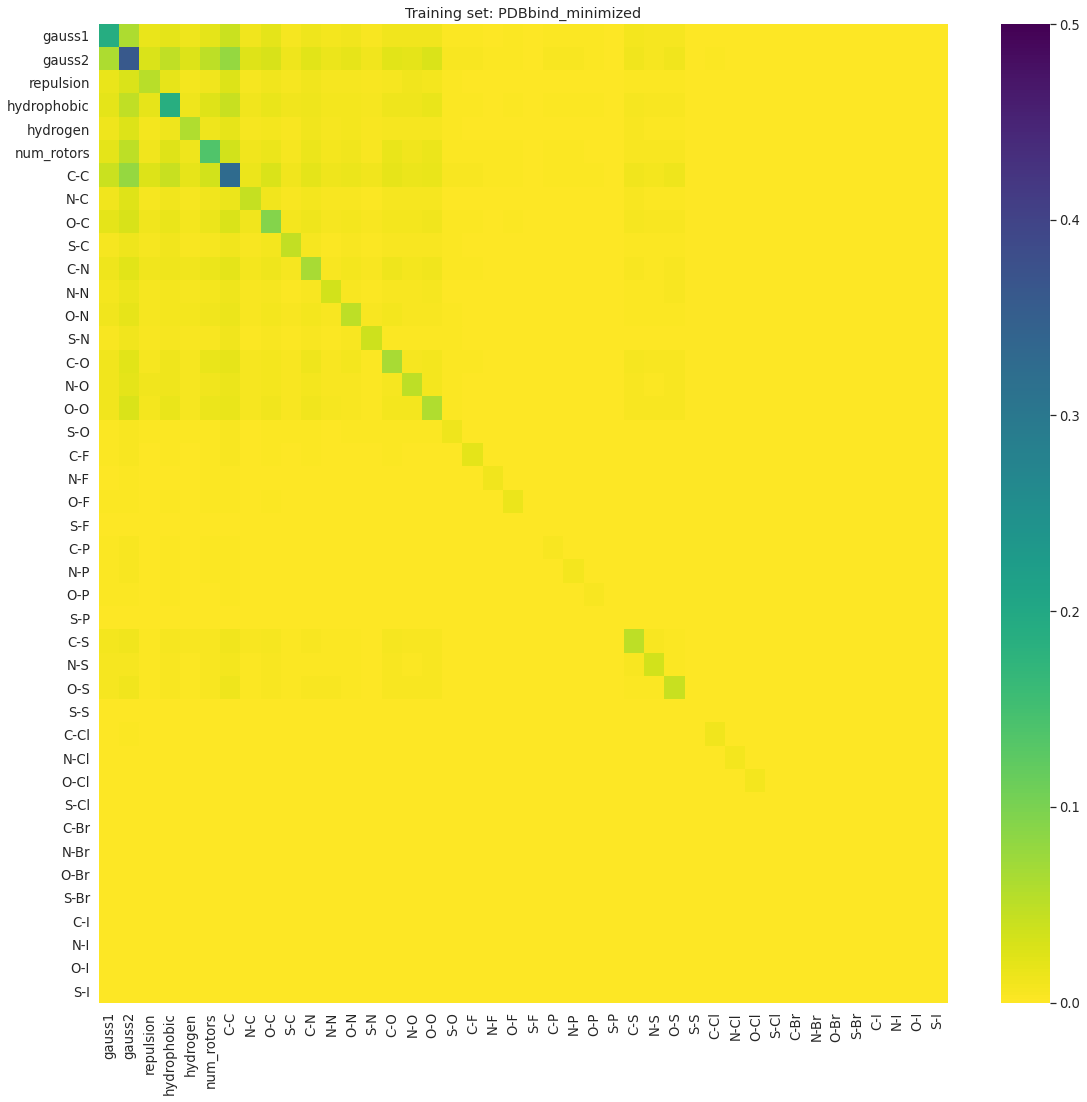

In [81]:
cm = plt.cm.get_cmap('viridis_r')
mean_shap = np.abs(Pm_shap_inter).mean(0)
df = pd.DataFrame(mean_shap,index=changed_feature_list,columns=changed_feature_list)
df.where(df.values == np.diagonal(df), df.values*2, inplace=True)
plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
sns.heatmap(df,cmap=cm,fmt='.3g',cbar=True,vmin=0, vmax=0.5)
plt.yticks(rotation=0)
plt.title(f"Training set: {dataset_name}")
plt.savefig(f"{shap_dir}/{dataset_name}/imgs/{dataset_name}_inter_value_heatmap.png", dpi=800, bbox_inches='tight')
# plt.close()

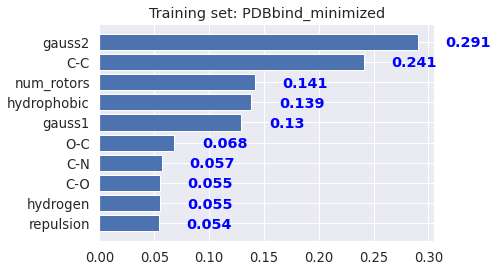

In [82]:
mean_feature = np.mean(np.abs(np.sum(Pm_shap_inter, axis=1)), axis=0)
sorted_idx = np.argsort(mean_feature)
fig, ax = plt.subplots()
ax.barh(np.array(changed_feature_list)[sorted_idx][-10:], mean_feature[sorted_idx][-10:])
for i, v in enumerate(mean_feature[sorted_idx][-10:]):
    ax.text(v+0.025, i - .25, round(v, 3),
            color = 'blue', fontweight = 'bold')
plt.title(f"Training set: {dataset_name}")
plt.savefig(f"{shap_dir}/{dataset_name}/imgs/{dataset_name}_inter_value_mean_shap_top_10.png", dpi=800, bbox_inches='tight')
# plt.close()

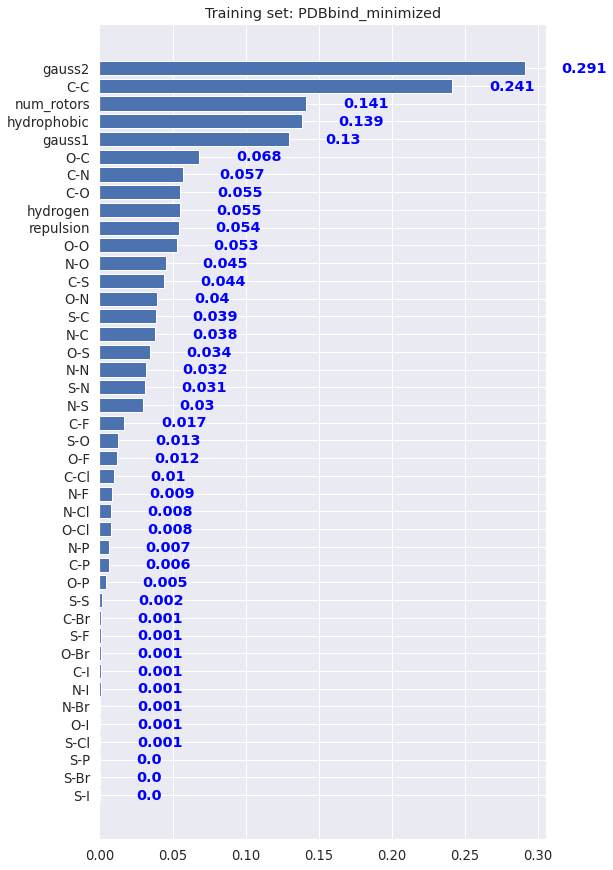

In [83]:
mean_feature = np.mean(np.abs(np.sum(Pm_shap_inter, axis=1)), axis=0)
sorted_idx = np.argsort(mean_feature)
fig, ax = plt.subplots(figsize=(8,15))
ax.barh(np.array(changed_feature_list)[sorted_idx], mean_feature[sorted_idx])
for i, v in enumerate(mean_feature[sorted_idx]):
    ax.text(v+0.025, i - .25, round(v, 3),
            color = 'blue', fontweight = 'bold')
plt.title(f"Training set: {dataset_name}")
plt.savefig(f"{shap_dir}/{dataset_name}/imgs/{dataset_name}_inter_value_mean_shap.png", dpi=800, bbox_inches='tight')
# plt.close()

# PDBbind_minimized_inter_Uw

In [18]:
dataset_name = 'PDBbind_minimized_intersected_Uw'

In [19]:
PIP_npy = '/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/shap_res/PDBbind_minimized_intersected_Uw/training_1.npy'
PIP_shap_inter = np.load(PIP_npy)
PIP_shap_inter.shape

(4634, 42, 42)

In [20]:
PIP_train = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/PDBbind/pdbbind_v2019/minimized/dataset/PDBbind_minimized_intersected_Uw_rm_core_ids/complex_6A/train.csv', sep='\t', header=0, names=['unique_identify', '-logAffi'])
PIP_feature = pd.merge(PIP_train, features, on=['unique_identify','-logAffi'])
PIP_feature.rename(columns=change_name_dict, inplace=True)
PIP_feature.shape

(4634, 152)

In [87]:
out_dir = '/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/shap_res/PDBbind_minimized_intersected_Uw/imgs'
if not Path.exists(Path(out_dir)):
    Path.mkdir(Path(out_dir), exist_ok=True)

<Figure size 1368x1296 with 0 Axes>

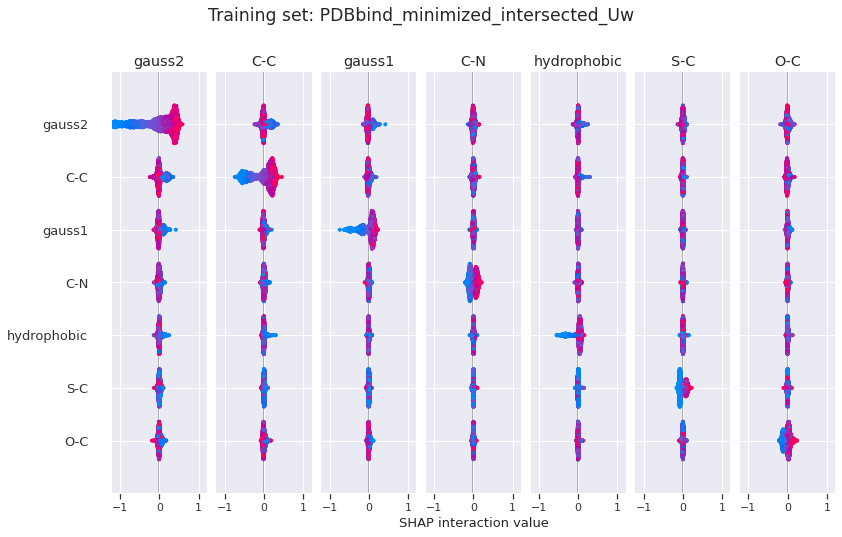

In [88]:
plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
shap.summary_plot(PIP_shap_inter, PIP_feature[changed_feature_list], plot_type="bar", show=False)
plt.suptitle(f'Training set: {dataset_name}', y=1.1)
plt.savefig(f"{out_dir}/{dataset_name}_inter_value_beeswarm.png", dpi=800, bbox_inches='tight')
# plt.close()

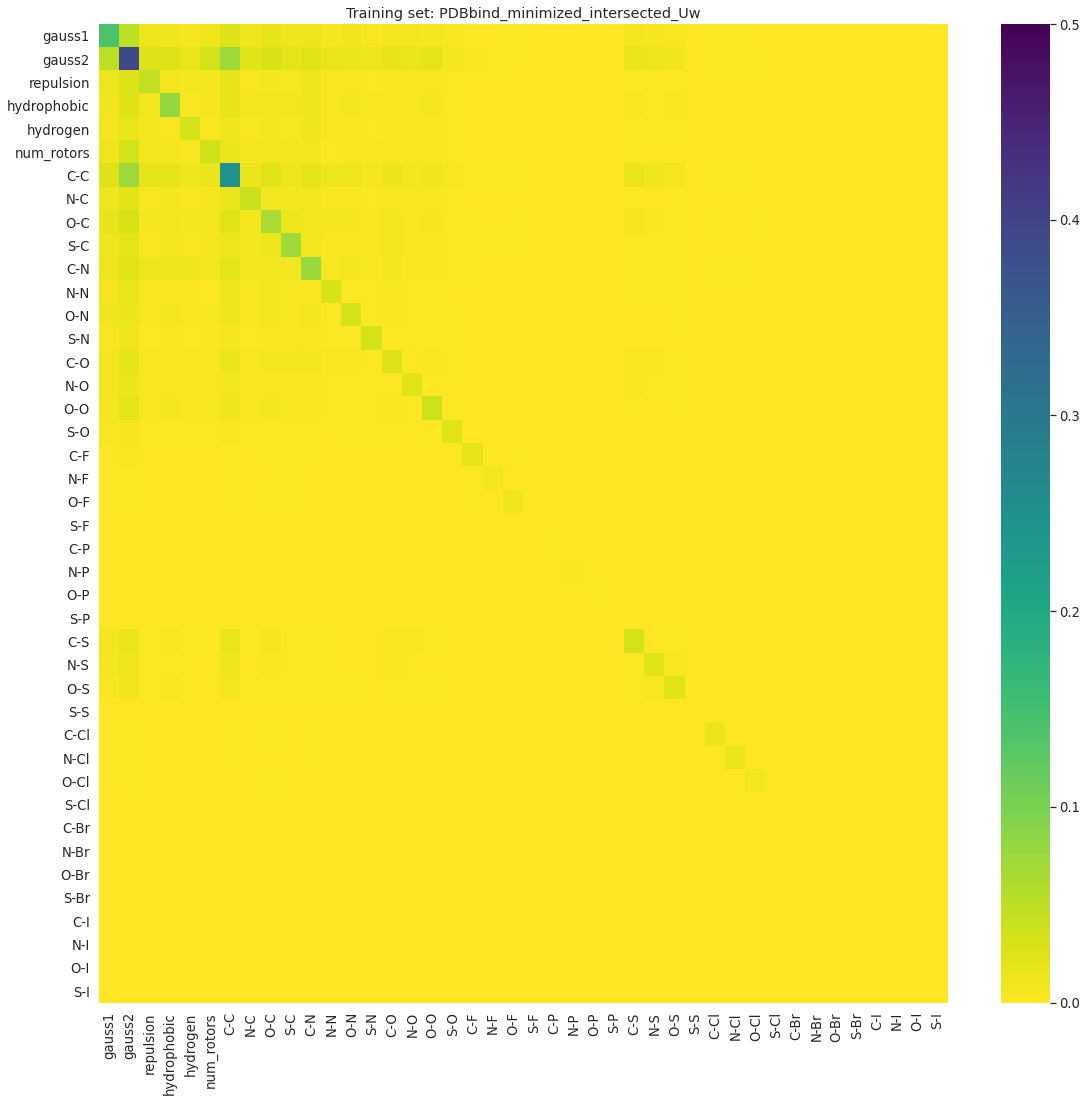

In [90]:
cm = plt.cm.get_cmap('viridis_r')
mean_shap = np.abs(PIP_shap_inter).mean(0)
df = pd.DataFrame(mean_shap,index=changed_feature_list,columns=changed_feature_list)
df.where(df.values == np.diagonal(df), df.values*2, inplace=True)
plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
sns.heatmap(df,cmap=cm,fmt='.3g',cbar=True,vmin=0, vmax=0.5)
plt.yticks(rotation=0)
plt.title(f"Training set: {dataset_name}")
plt.savefig(f"{out_dir}/{dataset_name}_inter_value_heatmap.png", dpi=800, bbox_inches='tight')
# plt.close()

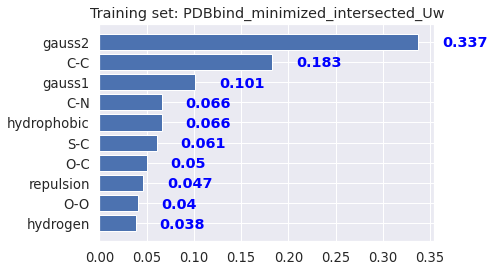

In [91]:
mean_feature = np.mean(np.abs(np.sum(PIP_shap_inter, axis=1)), axis=0)
sorted_idx = np.argsort(mean_feature)
fig, ax = plt.subplots()
ax.barh(np.array(changed_feature_list)[sorted_idx][-10:], mean_feature[sorted_idx][-10:])
for i, v in enumerate(mean_feature[sorted_idx][-10:]):
    ax.text(v+0.025, i - .25, round(v, 3),
            color = 'blue', fontweight = 'bold')
plt.title(f"Training set: {dataset_name}")
plt.savefig(f"{out_dir}/{dataset_name}_inter_value_mean_shap_top_10.png", dpi=800, bbox_inches='tight')
# plt.close()

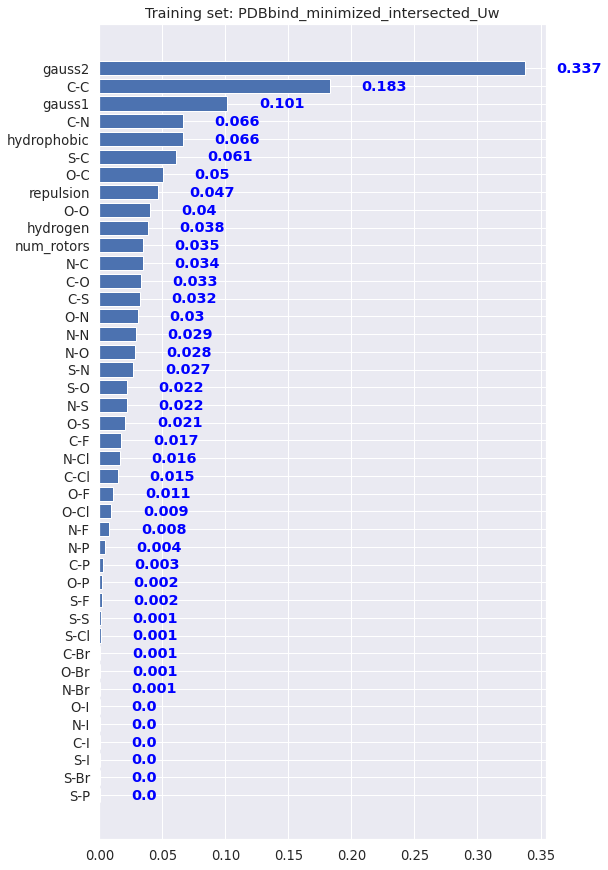

In [92]:
mean_feature = np.mean(np.abs(np.sum(PIP_shap_inter, axis=1)), axis=0)
sorted_idx = np.argsort(mean_feature)
fig, ax = plt.subplots(figsize=(8,15))
ax.barh(np.array(changed_feature_list)[sorted_idx], mean_feature[sorted_idx])
for i, v in enumerate(mean_feature[sorted_idx]):
    ax.text(v+0.025, i - .25, round(v, 3),
            color = 'blue', fontweight = 'bold')
plt.title(f"Training set: {dataset_name}")
plt.savefig(f"{out_dir}/{dataset_name}_inter_value_mean_shap.png", dpi=800, bbox_inches='tight')
# plt.close()

In [99]:
# np.sum(np.mean(np.abs(np.sum(PIP_shap_inter, axis=1)), axis=0))

1.396918236510312

In [107]:
# np.sum(np.mean(np.sum(PIP_shap_inter, axis=1), axis=0))

-0.0018185155453349351

In [108]:
# np.sum(np.mean(np.sum(Pm_shap_inter, axis=1), axis=0))

0.002065384494086908

In [109]:
# np.sum(np.mean(np.sum(Uw_shap_inter, axis=1), axis=0))

0.0015611393018559953

In [21]:
ft_Uw = pd.DataFrame({'Dataname':'PLANet','feature_SHAP':np.mean(np.abs(np.sum(Uw_shap_inter, axis=1)), axis=0), 'feature':changed_feature_list})
ft_Pm = pd.DataFrame({'Dataname':'PDBbind','feature_SHAP':np.mean(np.abs(np.sum(Pm_shap_inter, axis=1)), axis=0), 'feature':changed_feature_list})
ft_Pm.sort_values(by='feature_SHAP', ascending=False, inplace=True)
ft_PIP = pd.DataFrame({'Dataname':'PIP','feature_SHAP':np.mean(np.abs(np.sum(PIP_shap_inter, axis=1)), axis=0), 'feature':changed_feature_list})
ft_df = pd.concat([ft_Pm, ft_PIP, ft_Uw])
ft_df

,Dataname,feature_SHAP,feature
1,PDBbind,0.290795,gauss2
6,PDBbind,0.241480,C-C
5,PDBbind,0.141441,num_rotors
3,PDBbind,0.138548,hydrophobic
0,PDBbind,0.129507,gauss1
...,...,...,...
37,PLANet,0.000219,S-Br
38,PLANet,0.000359,C-I
39,PLANet,0.000355,N-I
40,PLANet,0.000328,O-I


In [22]:
ft_df.to_csv('/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/mean_feature_shap_for_3_dataset.csv', sep='\t', index=False)

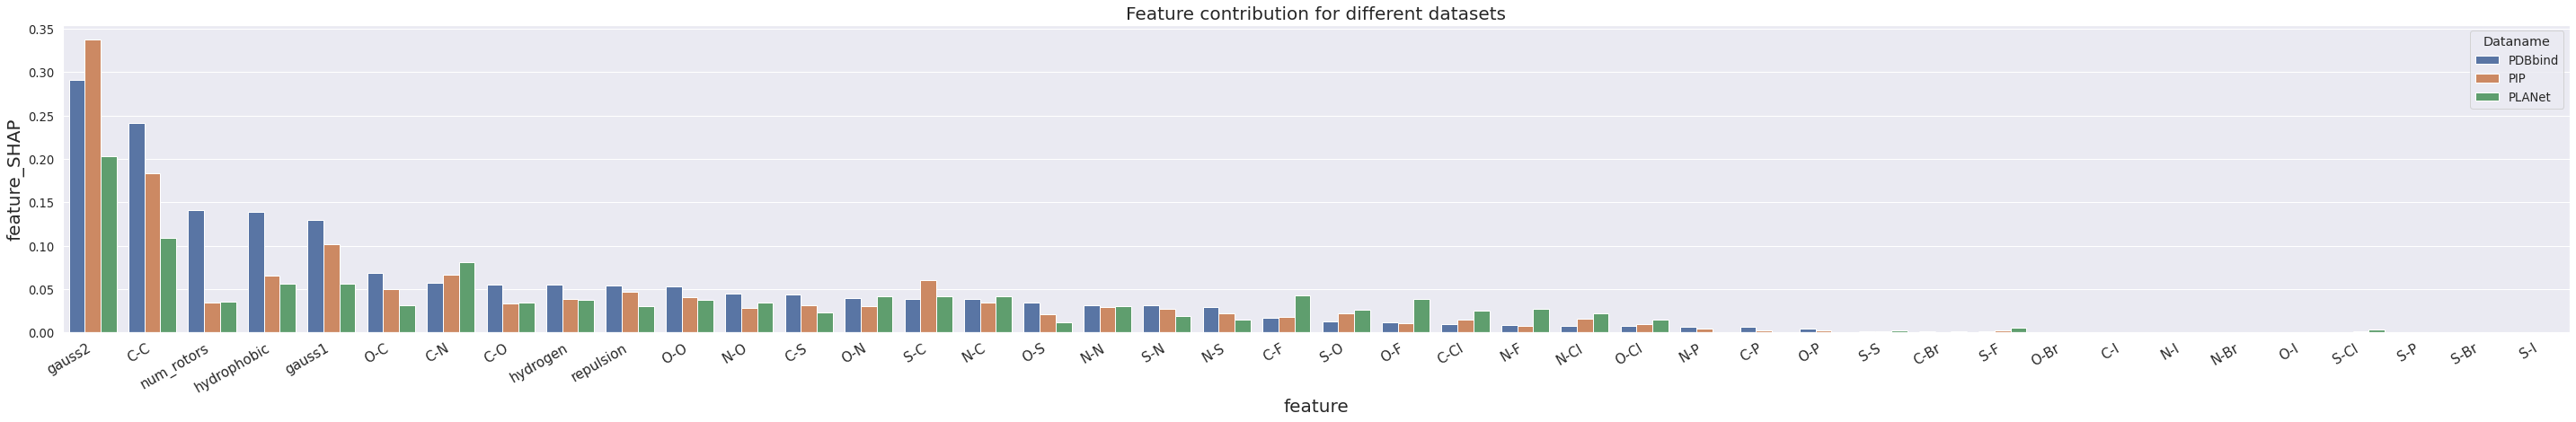

In [115]:
fig, ax = plt.subplots(figsize=(50, 7))
fig.autofmt_xdate()
sns.barplot(x="feature", y="feature_SHAP", hue="Dataname", data=ft_df)
ax.set_title(f'Feature contribution for different datasets', fontsize=20)
ax.set_xlabel(f'feature', fontsize=20)
ax.set_ylabel(f'feature_SHAP', fontsize=20)
ax.tick_params(axis='x', labelsize= 15)
plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/feature_shap_for_3_dataset.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Training set: PDBbind')

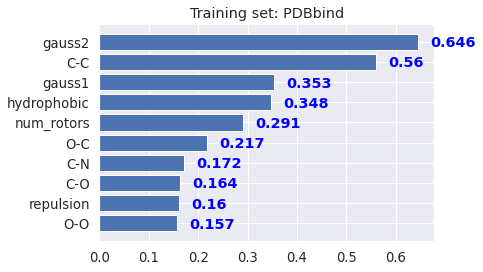

In [119]:
mean_feature = np.mean(np.sum(np.abs(Pm_shap_inter), axis=1), axis=0)
sorted_idx = np.argsort(mean_feature)
fig, ax = plt.subplots()
ax.barh(np.array(changed_feature_list)[sorted_idx][-10:], mean_feature[sorted_idx][-10:])
for i, v in enumerate(mean_feature[sorted_idx][-10:]):
    ax.text(v+0.025, i - .25, round(v, 3),
            color = 'blue', fontweight = 'bold')
plt.title(f"Training set: PDBbind")
# plt.savefig(f"{out_dir}/{dataset_name}_inter_value_mean_shap_top_10.png", dpi=800, bbox_inches='tight')
# plt.close()

Text(0.5, 1.0, 'Training set: PIP')

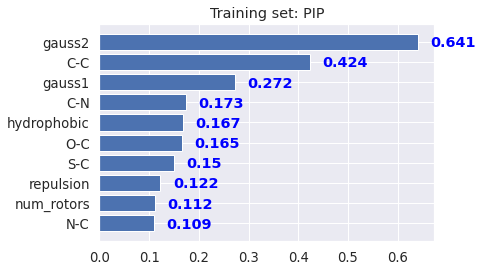

In [117]:
mean_feature = np.mean(np.sum(np.abs(PIP_shap_inter), axis=1), axis=0)
sorted_idx = np.argsort(mean_feature)
fig, ax = plt.subplots()
ax.barh(np.array(changed_feature_list)[sorted_idx][-10:], mean_feature[sorted_idx][-10:])
for i, v in enumerate(mean_feature[sorted_idx][-10:]):
    ax.text(v+0.025, i - .25, round(v, 3),
            color = 'blue', fontweight = 'bold')
plt.title(f"Training set: PIP")
# plt.savefig(f"{out_dir}/{dataset_name}_inter_value_mean_shap_top_10.png", dpi=800, bbox_inches='tight')
# plt.close()

Text(0.5, 1.0, 'Training set: PLANet')

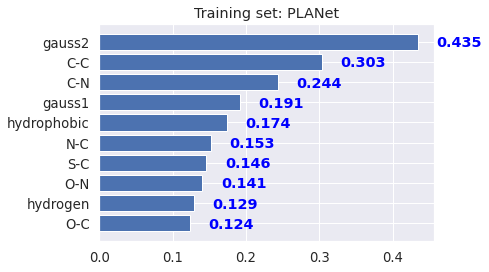

In [120]:
mean_feature = np.mean(np.sum(np.abs(Uw_shap_inter), axis=1), axis=0)
sorted_idx = np.argsort(mean_feature)
fig, ax = plt.subplots()
ax.barh(np.array(changed_feature_list)[sorted_idx][-10:], mean_feature[sorted_idx][-10:])
for i, v in enumerate(mean_feature[sorted_idx][-10:]):
    ax.text(v+0.025, i - .25, round(v, 3),
            color = 'blue', fontweight = 'bold')
plt.title(f"Training set: PLANet")
# plt.savefig(f"{out_dir}/{dataset_name}_inter_value_mean_shap_top_10.png", dpi=800, bbox_inches='tight')
# plt.close()

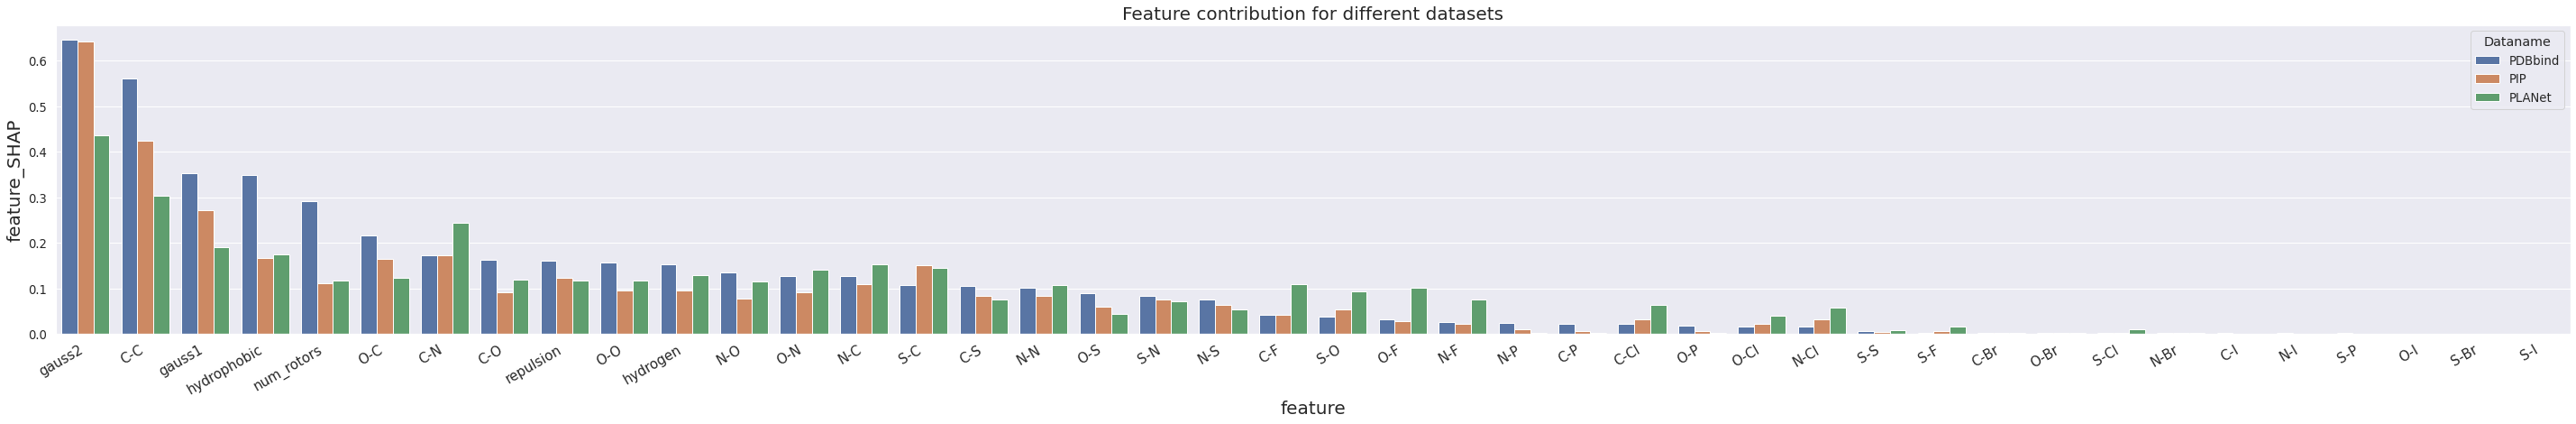

In [121]:
ft_Uw = pd.DataFrame({'Dataname':'PLANet','feature_SHAP':np.mean(np.sum(np.abs(Uw_shap_inter), axis=1), axis=0), 'feature':changed_feature_list})
ft_Pm = pd.DataFrame({'Dataname':'PDBbind','feature_SHAP':np.mean(np.sum(np.abs(Pm_shap_inter), axis=1), axis=0), 'feature':changed_feature_list})
ft_Pm.sort_values(by='feature_SHAP', ascending=False, inplace=True)
ft_PIP = pd.DataFrame({'Dataname':'PIP','feature_SHAP':np.mean(np.sum(np.abs(PIP_shap_inter), axis=1), axis=0), 'feature':changed_feature_list})
ft_df = pd.concat([ft_Pm, ft_PIP, ft_Uw])

fig, ax = plt.subplots(figsize=(50, 7))
fig.autofmt_xdate()
sns.barplot(x="feature", y="feature_SHAP", hue="Dataname", data=ft_df)
ax.set_title(f'Feature contribution for different datasets', fontsize=20)
ax.set_xlabel(f'feature', fontsize=20)
ax.set_ylabel(f'feature_SHAP', fontsize=20)
ax.tick_params(axis='x', labelsize= 15)
# plt.savefig(f'/pubhome/xli02/project/PLIM/deep_learning/RFscore/3-shap/feature_shap_for_3_dataset.png', dpi=300, bbox_inches='tight')

# 5.9 specific id

# 1. Uw: C-F

In [126]:
changed_feature_list.index('C-F')

18

In [131]:
Uw_shap_inter.shape

(55798, 42, 42)

In [135]:
Uw_shap_inter[1][18][18]

-0.000757915262390461

In [155]:
Uw_shap_inter[:,changed_feature_list.index('C-F'),changed_feature_list.index('C-F')]

array([-0.00770282, -0.00075792,  0.03498484, ..., -0.11366712,
       -0.11658268, -0.08457851])

In [156]:
np.argmax(Uw_shap_inter[:,changed_feature_list.index('C-F'),changed_feature_list.index('C-F')])

822

In [157]:
Uw_shap_inter[:,changed_feature_list.index('C-F'),changed_feature_list.index('C-F')][822]

0.2872361249412843

In [161]:
Uw_feature['unique_identify'][822]

'CHEMBL1741186_4nb6_CHEMBL3799700'

In [71]:
with open(f"/pubhome/xli02/project/PLIM/deep_learning/RFscore/test_res/PLANet_Uw_Rm_core/1/best_model_VR1_RF.pkl", "rb") as f:
    Uw_model = joblib.load(f)
Uw_explainer = shap.TreeExplainer(Uw_model)
Uw_expected_value = Uw_explainer.expected_value
Uw_expected_value

array([7.17814306])

In [70]:
with open(f"/pubhome/xli02/project/PLIM/deep_learning/RFscore/test_res/PDBbind_minimized_Rm_core/1/best_model_VR1_RF.pkl", "rb") as f:
    Pm_model = joblib.load(f)
Pm_explainer = shap.TreeExplainer(Pm_model)
Pm_expected_value = Pm_explainer.expected_value
Pm_expected_value

array([6.35692538])

In [72]:
with open(f"/pubhome/xli02/project/PLIM/deep_learning/RFscore/test_res/PDBbind_minimized_intersected_Uw_Rm_core/1/best_model_VR1_RF.pkl", "rb") as f:
    PIP_model = joblib.load(f)
PIP_explainer = shap.TreeExplainer(PIP_model)
PIP_expected_value = PIP_explainer.expected_value
PIP_expected_value

array([7.00107061])

In [31]:
Uw_shap_inter.shape

(55798, 42, 42)

# ~~decision plot~~

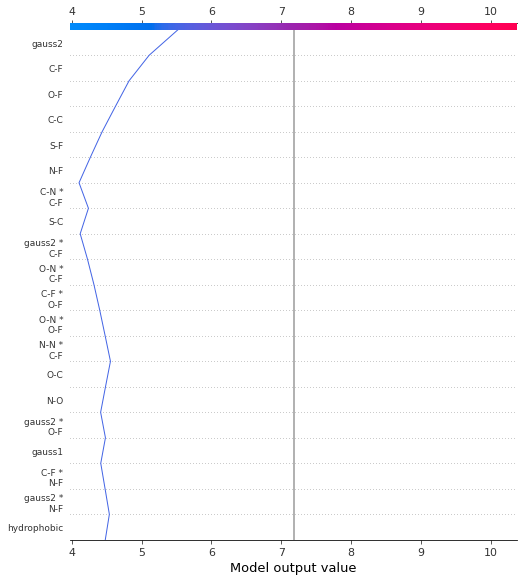

In [29]:
# shap.decision_plot(Uw_expected_value, Uw_shap_inter[822:823],feature_names=changed_feature_list)

# waterfall

In [50]:
# Uw_expected_value[0]

7.17814305623364

In [49]:
# (type(Uw_expected_value) == np.ndarray and len(Uw_expected_value) > 0) or type(Uw_expected_value) == list

True

In [62]:
from shap.utils import safe_isinstance, format_value
from shap.plots import colors
import matplotlib

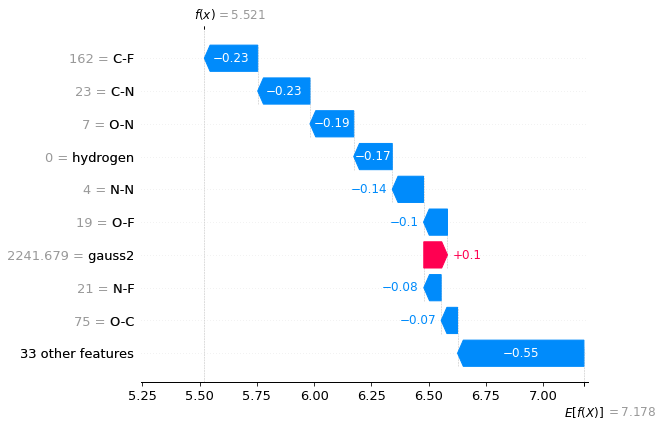

In [66]:
waterfall(Uw_expected_value[0], np.array(Uw_feature[changed_feature_list])[822], changed_feature_list, np.sum(Uw_shap_inter, axis=1)[822], max_display=10, show=True)

In [77]:
Pm_idx = np.where(Pm_feature['unique_identify'] == '4nb6')[0][0]
Pm_idx

8864

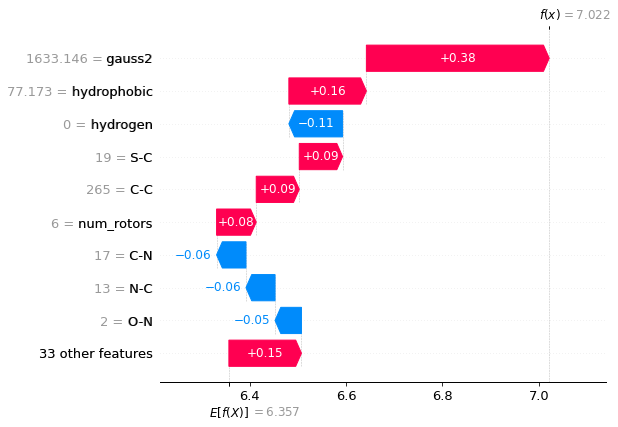

In [78]:
waterfall(Pm_expected_value[0], np.array(Pm_feature[changed_feature_list])[Pm_idx], changed_feature_list, np.sum(Pm_shap_inter, axis=1)[Pm_idx], max_display=10, show=True)

In [55]:
def waterfall(base_values, features, feature_names, values, max_display=10, show=True):
    # base_values = shap_values.base_values
    
    # features = shap_values.data
    # feature_names = shap_values.feature_names
    # # lower_bounds = getattr(shap_values, "lower_bounds", None)
    # # upper_bounds = getattr(shap_values, "upper_bounds", None)
    # values = shap_values.values

    # make sure we only have a single output to explain
    if (type(base_values) == np.ndarray and len(base_values) > 0) or type(base_values) == list:
        raise Exception("waterfall_plot requires a scalar base_values of the model output as the first " \
                        "parameter, but you have passed an array as the first parameter! " \
                        "Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or " \
                        "for multi-output models try " \
                        "shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).")

    # make sure we only have a single explanation to plot
    if len(values.shape) == 2:
        raise Exception("The waterfall_plot can currently only plot a single explanation but a matrix of explanations was passed!")
    
    # unwrap pandas series
    if safe_isinstance(features, "pandas.core.series.Series"):
        if feature_names is None:
            feature_names = list(features.index)
        features = features.values

    # fallback feature names
    if feature_names is None:
        feature_names = np.array([labels['FEATURE'] % str(i) for i in range(len(values))])
    
    # init variables we use for tracking the plot locations
    num_features = min(max_display, len(values))
    row_height = 0.5
    rng = range(num_features - 1, -1, -1)
    order = np.argsort(-np.abs(values))
    pos_lefts = []
    pos_inds = []
    pos_widths = []
    pos_low = []
    pos_high = []
    neg_lefts = []
    neg_inds = []
    neg_widths = []
    neg_low = []
    neg_high = []
    loc = base_values + values.sum()
    yticklabels = ["" for i in range(num_features + 1)]
    
    # size the plot based on how many features we are plotting
    plt.gcf().set_size_inches(8, num_features * row_height + 1.5)

    # see how many individual (vs. grouped at the end) features we are plotting
    if num_features == len(values):
        num_individual = num_features
    else:
        num_individual = num_features - 1

    # compute the locations of the individual features and plot the dashed connecting lines
    for i in range(num_individual):
        sval = values[order[i]]
        loc -= sval
        if sval >= 0:
            pos_inds.append(rng[i])
            pos_widths.append(sval)
            # if lower_bounds is not None:
            #     pos_low.append(lower_bounds[order[i]])
            #     pos_high.append(upper_bounds[order[i]])
            pos_lefts.append(loc)
        else:
            neg_inds.append(rng[i])
            neg_widths.append(sval)
            # if lower_bounds is not None:
            #     neg_low.append(lower_bounds[order[i]])
            #     neg_high.append(upper_bounds[order[i]])
            neg_lefts.append(loc)
        if num_individual != num_features or i + 4 < num_individual:
            plt.plot([loc, loc], [rng[i] -1 - 0.4, rng[i] + 0.4], color="#bbbbbb", linestyle="--", linewidth=0.5, zorder=-1)
        if features is None:
            yticklabels[rng[i]] = feature_names[order[i]]
        else:
            yticklabels[rng[i]] = format_value(features[order[i]], "%0.03f") + " = " + feature_names[order[i]] 
    
    # add a last grouped feature to represent the impact of all the features we didn't show
    if num_features < len(values):
        yticklabels[0] = "%d other features" % (len(values) - num_features + 1)
        remaining_impact = base_values - loc
        if remaining_impact < 0:
            pos_inds.append(0)
            pos_widths.append(-remaining_impact)
            pos_lefts.append(loc + remaining_impact)
            c = colors.red_rgb
        else:
            neg_inds.append(0)
            neg_widths.append(-remaining_impact)
            neg_lefts.append(loc + remaining_impact)
            c = colors.blue_rgb

    points = pos_lefts + list(np.array(pos_lefts) + np.array(pos_widths)) + neg_lefts + list(np.array(neg_lefts) + np.array(neg_widths))
    dataw = np.max(points) - np.min(points)
    
    # draw invisible bars just for sizing the axes
    label_padding = np.array([0.1*dataw if w < 1 else 0 for w in pos_widths])
    plt.barh(pos_inds, np.array(pos_widths) + label_padding + 0.02*dataw, left=np.array(pos_lefts) - 0.01*dataw, color=colors.red_rgb, alpha=0)
    label_padding = np.array([-0.1*dataw  if -w < 1 else 0 for w in neg_widths])
    plt.barh(neg_inds, np.array(neg_widths) + label_padding - 0.02*dataw, left=np.array(neg_lefts) + 0.01*dataw, color=colors.blue_rgb, alpha=0)
    
    # define variable we need for plotting the arrows
    head_length = 0.08
    bar_width = 0.8
    xlen = plt.xlim()[1] - plt.xlim()[0]
    fig = plt.gcf()
    ax = plt.gca()
    xticks = ax.get_xticks()
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width, height = bbox.width, bbox.height
    bbox_to_xscale = xlen/width
    hl_scaled = bbox_to_xscale * head_length
    renderer = fig.canvas.get_renderer()
    
    # draw the positive arrows
    for i in range(len(pos_inds)):
        dist = pos_widths[i]
        arrow_obj = plt.arrow(
            pos_lefts[i], pos_inds[i], max(dist-hl_scaled, 0.000001), 0,
            head_length=min(dist, hl_scaled),
            color=colors.red_rgb, width=bar_width,
            head_width=bar_width
        )
        
        if pos_low is not None and i < len(pos_low):
            plt.errorbar(
                pos_lefts[i] + pos_widths[i], pos_inds[i], 
                xerr=np.array([[pos_widths[i] - pos_low[i]], [pos_high[i] - pos_widths[i]]]),
                ecolor=colors.light_red_rgb
            )

        txt_obj = plt.text(
            pos_lefts[i] + 0.5*dist, pos_inds[i], format_value(pos_widths[i], '%+0.02f'),
            horizontalalignment='center', verticalalignment='center', color="white",
            fontsize=12
        )
        text_bbox = txt_obj.get_window_extent(renderer=renderer)
        arrow_bbox = arrow_obj.get_window_extent(renderer=renderer)
        
        # if the text overflows the arrow then draw it after the arrow
        if text_bbox.width > arrow_bbox.width: 
            txt_obj.remove()
            
            txt_obj = plt.text(
                pos_lefts[i] + (5/72)*bbox_to_xscale + dist, pos_inds[i], format_value(pos_widths[i], '%+0.02f'),
                horizontalalignment='left', verticalalignment='center', color=colors.red_rgb,
                fontsize=12
            )
    
    # draw the negative arrows
    for i in range(len(neg_inds)):
        dist = neg_widths[i]
        
        arrow_obj = plt.arrow(
            neg_lefts[i], neg_inds[i], -max(-dist-hl_scaled, 0.000001), 0,
            head_length=min(-dist, hl_scaled),
            color=colors.blue_rgb, width=bar_width,
            head_width=bar_width
        )

        if neg_low is not None and i < len(neg_low):
            plt.errorbar(
                neg_lefts[i] + neg_widths[i], neg_inds[i], 
                xerr=np.array([[neg_widths[i] - neg_low[i]], [neg_high[i] - neg_widths[i]]]),
                ecolor=colors.light_blue_rgb
            )
        
        txt_obj = plt.text(
            neg_lefts[i] + 0.5*dist, neg_inds[i], format_value(neg_widths[i], '%+0.02f'),
            horizontalalignment='center', verticalalignment='center', color="white",
            fontsize=12
        )
        text_bbox = txt_obj.get_window_extent(renderer=renderer)
        arrow_bbox = arrow_obj.get_window_extent(renderer=renderer)
        
        # if the text overflows the arrow then draw it after the arrow
        if text_bbox.width > arrow_bbox.width: 
            txt_obj.remove()
            
            txt_obj = plt.text(
                neg_lefts[i] - (5/72)*bbox_to_xscale + dist, neg_inds[i], format_value(neg_widths[i], '%+0.02f'),
                horizontalalignment='right', verticalalignment='center', color=colors.blue_rgb,
                fontsize=12
            )

    # draw the y-ticks twice, once in gray and then again with just the feature names in black
    ytick_pos = list(range(num_features)) + list(np.arange(num_features)+1e-8) # The 1e-8 is so matplotlib 3.3 doesn't try and collapse the ticks
    plt.yticks(ytick_pos, yticklabels[:-1] + [l.split('=')[-1] for l in yticklabels[:-1]], fontsize=13)
    
    # put horizontal lines for each feature row
    for i in range(num_features):
        plt.axhline(i, color="#cccccc", lw=0.5, dashes=(1, 5), zorder=-1)
    
    # mark the prior expected value and the model prediction
    plt.axvline(base_values, 0, 1/num_features, color="#bbbbbb", linestyle="--", linewidth=0.5, zorder=-1)
    fx = base_values + values.sum()
    plt.axvline(fx, 0, 1, color="#bbbbbb", linestyle="--", linewidth=0.5, zorder=-1)
    
    # clean up the main axis
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('none')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    ax.tick_params(labelsize=13)
    #plt.xlabel("\nModel output", fontsize=12)

    # draw the E[f(X)] tick mark
    xmin,xmax = ax.get_xlim()
    ax2=ax.twiny()
    ax2.set_xlim(xmin,xmax)
    ax2.set_xticks([base_values, base_values+1e-8]) # The 1e-8 is so matplotlib 3.3 doesn't try and collapse the ticks
    ax2.set_xticklabels(["\n$E[f(X)]$","\n$ = "+format_value(base_values, "%0.03f")+"$"], fontsize=12, ha="left")
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    # draw the f(x) tick mark
    ax3=ax2.twiny()
    ax3.set_xlim(xmin,xmax)
    ax3.set_xticks([base_values + values.sum(), base_values + values.sum() + 1e-8]) # The 1e-8 is so matplotlib 3.3 doesn't try and collapse the ticks
    ax3.set_xticklabels(["$f(x)$","$ = "+format_value(fx, "%0.03f")+"$"], fontsize=12, ha="left")
    tick_labels = ax3.xaxis.get_majorticklabels()
    tick_labels[0].set_transform(tick_labels[0].get_transform() + matplotlib.transforms.ScaledTranslation(-10/72., 0, fig.dpi_scale_trans))
    tick_labels[1].set_transform(tick_labels[1].get_transform() + matplotlib.transforms.ScaledTranslation(12/72., 0, fig.dpi_scale_trans))
    tick_labels[1].set_color("#999999")
    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.spines['left'].set_visible(False)

    # adjust the position of the E[f(X)] = x.xx label
    tick_labels = ax2.xaxis.get_majorticklabels()
    tick_labels[0].set_transform(tick_labels[0].get_transform() + matplotlib.transforms.ScaledTranslation(-20/72., 0, fig.dpi_scale_trans))
    tick_labels[1].set_transform(tick_labels[1].get_transform() + matplotlib.transforms.ScaledTranslation(22/72., -1/72., fig.dpi_scale_trans))
    
    tick_labels[1].set_color("#999999")

    # color the y tick labels that have the feature values as gray
    # (these fall behind the black ones with just the feature name)
    tick_labels = ax.yaxis.get_majorticklabels()
    for i in range(num_features):
        tick_labels[i].set_color("#999999")
    
    if show:
        plt.show()

In [162]:
Uw_shap_values = np.sum(Uw_shap_inter, axis=1)
shap.plots.waterfall(Uw_shap_values[822])

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

# 2. simiarity = 1

In [87]:
Uw_info = pd.read_csv('/pubhome/xli02/project/PLIM/v2019_dataset/index/PLANet_Uw_dealt_median.csv', sep='\t')
Uw_info[Uw_info['Similarity']==1]

,unique_identify,-logAffi,Target_chembl_id,Cry_lig_name,Cry_lig_smiles,Cry_lig_an,Similar_compnd_name,Similar_compnd_smiles,Similar_compnd_an,Similarity,...,Diff_an,Part_fix,Total_sampled_num,Similar_compnd_conform,Total_delta,Lig_delta,Core_RMSD,MolWt,MCS_smarts,target_compnd
0,CHEMBL1075026_1swr_CHEMBL857,14.000000,CHEMBL1075026,1swr,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@H]12,16,CHEMBL857,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@H]12,16,1.0,...,0,No,6,CHEMBL857-0-0,-51.95,-3.19,0.283368,244.088163,[#6](-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]1...,CHEMBL1075026_CHEMBL857
1,CHEMBL1075027_1hp5_CHEMBL257158,4.698970,CHEMBL1075027,1hp5,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,CHEMBL257158,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,1.0,...,0,No,6,CHEMBL257158-1-0,22.72,-9.82,0.259684,219.056529,[#6]12-&@[#6](-&@[#16]-&@[#6](=&@[#7]-&@1)-&!@...,CHEMBL1075027_CHEMBL257158
2,CHEMBL1075027_1hp5_CHEMBL403756,4.000000,CHEMBL1075027,1hp5,CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1,14,CHEMBL403756,CC1=N[C@H]2[C@H](O[C@H](CO)[C@H](O)[C@@H]2O)S1,14,1.0,...,0,No,6,CHEMBL403756-0-0,11.87,-3.73,0.667258,219.056529,[#6]12-&@[#6](-&@[#16]-&@[#6](=&@[#7]-&@1)-&!@...,CHEMBL1075027_CHEMBL403756
4,CHEMBL1075027_1jak_CHEMBL253537,4.677781,CHEMBL1075027,1jak,CC(=O)N[C@H]1[NH2+]C[C@H](CO)[C@H](O)[C@@H]1O,14,CHEMBL253537,CC(=O)N[C@@H]1NC[C@H](CO)[C@H](O)[C@@H]1O,14,1.0,...,0,No,6,CHEMBL253537-0-0,-117.77,-16.52,0.342688,204.111007,[#6]1(-&@[#7]-&@[#6]-&@[#6](-&@[#6](-&@[#6]-&@...,CHEMBL1075027_CHEMBL253537
8,CHEMBL1075040_2o3z_CHEMBL1161949,5.698970,CHEMBL1075040,2o3z,CCCCCCCOc1cccc(C(=O)O)c1,17,CHEMBL1161949,CCCCCCCOc1cccc(C(=O)O)c1,17,1.0,...,0,No,6,CHEMBL1161949-0-0,-24.60,-1.15,0.541450,236.141244,[#6]1(:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@[#6]:&@1...,CHEMBL1075040_CHEMBL1161949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69788,CHEMBL6166_4obp_CHEMBL3262590,6.811953,CHEMBL6166,4obp,Nc1ncnc2ccc(-c3ccnc(F)c3)nc12,18,CHEMBL3262590,Nc1ncnc2ccc(-c3ccnc(F)c3)nc12,18,1.0,...,0,No,6,CHEMBL3262590-0-0,-34.62,-1.96,0.168637,241.076373,[#6]1:&@[#6]:&@[#6](:&@[#7]:&@[#6]2:&@[#6]:&@1...,CHEMBL6166_CHEMBL3262590
69791,CHEMBL6166_4u43_CHEMBL3326654,4.318759,CHEMBL6166,4u43,c1cncc(Nc2ncnn3cccc23)c1,16,CHEMBL3326654,c1cncc(Nc2ncnn3cccc23)c1,16,1.0,...,0,No,6,CHEMBL3326654-1-0,-19.20,-0.98,0.352206,211.085795,[#6]1(:&@[#6]:&@[#7]:&@[#6]:&@[#6]:&@[#6]:&@1)...,CHEMBL6166_CHEMBL3326654
69796,CHEMBL6166_4u44_CHEMBL3326742,8.096910,CHEMBL6166,4u44,c1ccc(-c2cc3c(Nc4ccncc4)ncnn3c2)cc1,22,CHEMBL3326742,c1ccc(-c2cc3c(Nc4ccncc4)ncnn3c2)cc1,22,1.0,...,0,No,6,CHEMBL3326742-0-0,-31.48,-1.36,0.283282,287.117095,[#6]1(:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1)...,CHEMBL6166_CHEMBL3326742
69823,CHEMBL6166_5di1_CHEMBL3754283,7.588909,CHEMBL6166,5di1,CS(=O)(=O)c1ccc(-c2cc(-c3ccc(O)cc3)cnc2N)cc1,24,CHEMBL3754283,CS(=O)(=O)c1ccc(-c2cc(-c3ccc(O)cc3)cnc2N)cc1,24,1.0,...,0,No,6,CHEMBL3754283-3-0,-38.84,-3.92,0.611367,340.088163,[#6]1(-&!@[#6]2:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&...,CHEMBL6166_CHEMBL3754283


In [97]:
Pm_train = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/RFscore/test_res/PDBbind_minimized_Rm_core/1/detail_data_Train_VR1_RF.csv')
Pm_train.rename(columns={'pred_label':'Pm_pred', 'true_label':'True_affi', 'unique_identify':'Cry_lig_name'}, inplace=True)
Pm_train

,Cry_lig_name,Pm_pred,True_affi
0,3zzf,3.309935,0.40
1,3gww,3.511785,0.45
2,1w8l,2.511418,0.49
3,3fqa,3.075712,0.49
4,1zsb,5.642814,0.60
...,...,...,...
13510,1amn,9.293814,13.82
13511,7cpa,9.970392,13.96
13512,2xuf,11.315847,14.39
13513,2xui,11.335851,15.00


In [101]:
Uw_train = pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/RFscore/test_res/PLANet_Uw_Rm_core/1/detail_data_Train_VR1_RF.csv')
Uw_train.rename(columns={'pred_label':'Uw_pred', 'true_label':'True_affi'}, inplace=True)
Uw_train['Cry_lig_name'] = [u.split('_')[1] for u in Uw_train['unique_identify']]
Uw_train_simi_1 = Uw_train[Uw_train['unique_identify'].isin(Uw_info[Uw_info['Similarity']==1]['unique_identify'])]
Uw_train_simi_1

,unique_identify,Uw_pred,True_affi,Cry_lig_name
20,CHEMBL2026_2hdq_CHEMBL1222314,3.582699,1.397940,2hdq
29,CHEMBL2026_2hdr_CHEMBL1462,2.970644,1.721246,2hdr
35,CHEMBL1914_6eqp_CHEMBL1200970,5.198684,1.917215,6eqp
50,CHEMBL2311243_5nzq_CHEMBL3262562,4.011391,2.031517,5nzq
53,CHEMBL4848_4tpw_CHEMBL254578,3.834826,2.058489,4tpw
...,...,...,...,...
55766,CHEMBL280_3wv1_CHEMBL3359091,9.185197,11.408935,3wv1
55784,CHEMBL2147_4n70_CHEMBL3105022,10.109815,12.000000,4n70
55786,CHEMBL2971_3jy9_CHEMBL584052,9.398635,12.000000,3jy9
55787,CHEMBL260_2yis_CHEMBL1938400,9.913114,12.000000,2yis


In [115]:
simi_1 = pd.merge(Uw_train_simi_1.round({'True_affi': 1}), Pm_train.round({'True_affi': 1}), on=['Cry_lig_name'])
simi_1

,unique_identify,Uw_pred,True_affi_x,Cry_lig_name,Pm_pred,True_affi_y
0,CHEMBL2026_2hdq_CHEMBL1222314,3.582699,1.4,2hdq,2.979696,1.4
1,CHEMBL1914_6eqp_CHEMBL1200970,5.198684,1.9,6eqp,5.691580,6.0
2,CHEMBL1914_6eqp_CHEMBL1206,5.198684,7.7,6eqp,5.691580,6.0
3,CHEMBL4848_4tpw_CHEMBL254578,3.834826,2.1,4tpw,5.069495,4.7
4,CHEMBL4105798_5tyh_CHEMBL1502137,3.704194,2.1,5tyh,3.482885,2.1
...,...,...,...,...,...,...
2355,CHEMBL275_3gwt_CHEMBL570015,9.358895,11.1,3gwt,9.089127,11.1
2356,CHEMBL3898_6bsl_CHEMBL4212386,8.796539,11.2,6bsl,7.640315,9.0
2357,CHEMBL2971_3jy9_CHEMBL584052,9.398635,12.0,3jy9,8.070166,9.0
2358,CHEMBL260_2yis_CHEMBL1938400,9.913114,12.0,2yis,8.251777,8.8


In [121]:
simi_1.to_csv('/pubhome/xli02/project/PLIM/deep_learning/RFscore/Uw_Pm_simi_1/Uw_Pm_training_simi_1.csv', sep='\t', index=False)

In [3]:
simi_1=pd.read_csv('/pubhome/xli02/project/PLIM/deep_learning/RFscore/Uw_Pm_simi_1/Uw_Pm_training_simi_1.csv', sep='\t')

Text(0.5, 1.0, 'Similarity = 1')

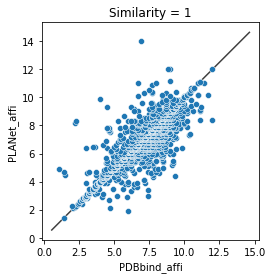

In [7]:
fig, ax = plt.subplots()
sns.scatterplot(data=simi_1, x='True_affi_y', y='True_affi_x', ax=ax)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('PDBbind_affi')
ax.set_ylabel('PLANet_affi')
ax.set_title('Similarity = 1')
# plt.close()

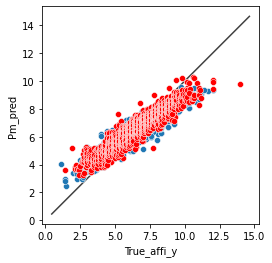

In [123]:
fig, ax = plt.subplots()
sns.scatterplot(data=simi_1, x="True_affi_y", y="Pm_pred", ax=ax)
sns.scatterplot(data=simi_1, x="True_affi_x", y="Uw_pred", color='red', ax=ax)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')

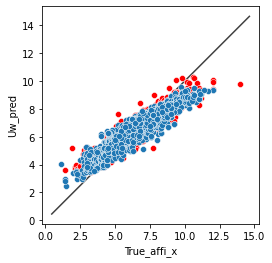

In [124]:
fig, ax = plt.subplots()
sns.scatterplot(data=simi_1, x="True_affi_x", y="Uw_pred", color='red', ax=ax)
sns.scatterplot(data=simi_1, x="True_affi_y", y="Pm_pred", ax=ax)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')

In [114]:
simi_1_affi_limit = pd.merge(Uw_train_simi_1.round({'True_affi': 1}), Pm_train.round({'True_affi': 1}), on=['Cry_lig_name', 'True_affi'])
simi_1_affi_limit

,unique_identify,Uw_pred,True_affi,Cry_lig_name,Pm_pred
0,CHEMBL2026_2hdq_CHEMBL1222314,3.582699,1.4,2hdq,2.979696
1,CHEMBL4105798_5tyh_CHEMBL1502137,3.704194,2.1,5tyh,3.482885
2,CHEMBL2311243_5nzo_CHEMBL4084029,3.967103,2.2,5nzo,3.540074
3,CHEMBL3232693_4np2_CHEMBL3237626,3.701772,2.3,4np2,2.950474
4,CHEMBL4822_4zsm_CHEMBL3586134,3.608868,2.4,4zsm,3.412984
...,...,...,...,...,...
1191,CHEMBL2902_1dis_CHEMBL296525,8.986661,11.0,1dis,8.686183
1192,CHEMBL4040_5bve_CHEMBL3608588,9.481819,11.0,5bve,9.305714
1193,CHEMBL4338_3k8o_CHEMBL475537,8.875732,11.1,3k8o,8.981374
1194,CHEMBL275_3gwt_CHEMBL570015,9.358895,11.1,3gwt,9.089127


In [109]:
simi_1_affi_limit.to_csv('/pubhome/xli02/project/PLIM/deep_learning/RFscore/Uw_Pm_simi_1/Uw_Pm_training_simi_1_same_affi.csv', sep='\t', index=False)

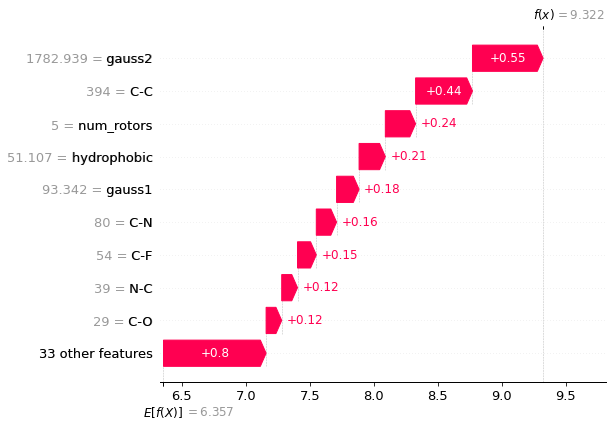

<Figure size 432x288 with 0 Axes>

In [112]:
Pm_idx = np.where(Pm_feature['unique_identify'] == '4n70')[0][0]
waterfall(Pm_expected_value[0], np.array(Pm_feature[changed_feature_list])[Pm_idx], changed_feature_list, np.sum(Pm_shap_inter, axis=1)[Pm_idx], max_display=10, show=True)
plt.savefig("/pubhome/xli02/project/PLIM/deep_learning/RFscore/Uw_Pm_simi_1/4n70_Pm.png", dpi=800, bbox_inches='tight')

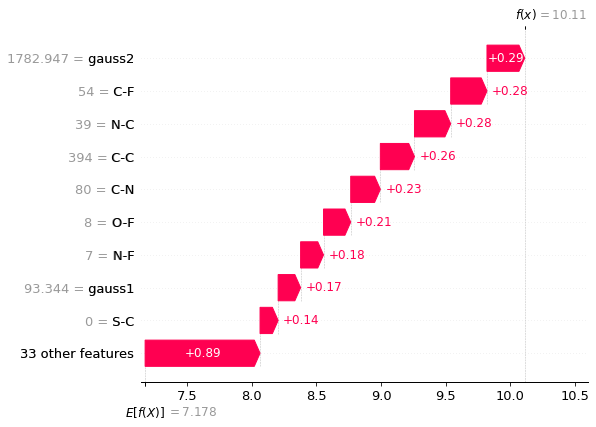

<Figure size 432x288 with 0 Axes>

In [113]:
Uw_idx = np.where(Uw_feature['unique_identify'] == 'CHEMBL2147_4n70_CHEMBL3105022')[0][0]
waterfall(Uw_expected_value[0], np.array(Uw_feature[changed_feature_list])[Uw_idx], changed_feature_list, np.sum(Uw_shap_inter, axis=1)[Uw_idx], max_display=10, show=True)
plt.savefig("/pubhome/xli02/project/PLIM/deep_learning/RFscore/Uw_Pm_simi_1/4n70_CHEMBL2147_CHEMBL3105022_Uw.png", dpi=800, bbox_inches='tight')

In [142]:
x = np.array([[[ 0,  1],
    [ 3,  4],
    [ 6,  7]],
   [[ 9, 10],
    [12, 13],
    [15, 16]],
   [[18, 19],
    [21, 22],
    [24, 25]],
   [[27, 28],
    [30, 31],
    [33, 34]]])

In [150]:
x[:,1,1]

array([ 4, 13, 22, 31])

In [143]:
x.sum(axis=0)

array([[54, 58],
       [66, 70],
       [78, 82]])

In [144]:
x.sum(axis=0).shape

(3, 2)

In [146]:
x.sum(axis=2)

array([[ 1,  7, 13],
       [19, 25, 31],
       [37, 43, 49],
       [55, 61, 67]])